In [1]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

df = pd.read_csv(r'C:/vscodefolder/AML_Lab/Datasets/winequality-red.csv')
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [2]:
y = df.pop('quality')

In [3]:
scaler = StandardScaler()
df_scaled = pd.DataFrame(scaler.fit_transform(df), columns= df.columns)



In [4]:
pca =PCA()
df_pca = pd.DataFrame(pca.fit_transform(df_scaled))

Text(0, 0.5, 'Explained Variance')

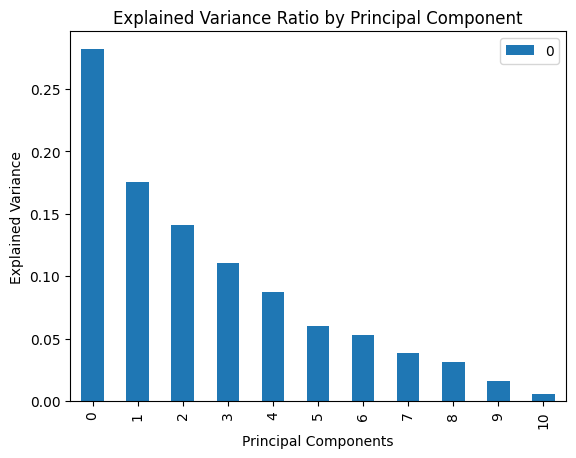

In [5]:
pd.DataFrame(pca.explained_variance_ratio_).plot.bar()
plt.title('Explained Variance Ratio by Principal Component')
plt.xlabel('Principal Components')
plt.ylabel('Explained Variance')


In [6]:
cumulative_explained_variance = np.cumsum(pca.explained_variance_ratio_)
threshold = 0.93

num_components_to_retain = np.argmax(cumulative_explained_variance >= threshold) + 1
print(f'Cumulative Explained Variance : \n {cumulative_explained_variance}')
print(f'Number of components to retain for {threshold *100}% Cumulative Explained Variance : {num_components_to_retain}')

Cumulative Explained Variance : 
 [0.28173931 0.45682201 0.59778051 0.70807438 0.79528275 0.85524714
 0.90831906 0.94676967 0.97810077 0.99458561 1.        ]
Number of components to retain for 93.0% Cumulative Explained Variance : 8
